# 25.03 Keras Project Normalization, Training, Evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('lending_club_feat_eng.csv', index_col=0)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,grade_num,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,INDIVIDUAL,JOINT,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,init_list_w,Source Verified,Verified,days_1st_cred_to_issue,Fully Paid
0,10000.0,36,11.44,329.48,10.0,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,9,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8980,1
1,8000.0,36,11.99,265.68,4.0,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,10,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3836,1
2,15600.0,36,10.49,506.97,0.0,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,8,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2710,1
3,7200.0,36,6.49,220.65,6.0,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2983,1
4,24375.0,60,17.27,609.33,9.0,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,15,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5145,0


In [6]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394703 entries, 0 to 396029
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               394703 non-null  float64
 1   term                    394703 non-null  int64  
 2   int_rate                394703 non-null  float64
 3   installment             394703 non-null  float64
 4   emp_length              394703 non-null  float64
 5   annual_inc              394703 non-null  float64
 6   dti                     394703 non-null  float64
 7   open_acc                394703 non-null  float64
 8   pub_rec                 394703 non-null  float64
 9   revol_bal               394703 non-null  float64
 10  revol_util              394703 non-null  float64
 11  total_acc               394703 non-null  float64
 12  mort_acc                394703 non-null  float64
 13  grade_num               394703 non-null  int64  
 14  ANY                 

# Split and Normalize the data 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df.drop('Fully Paid', axis=1).values
y=df['Fully Paid'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Normalize

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#help(MinMaxScaler)
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and Train an ANN
40 features going into a binary classifier. 
probably want a 40 neuron DNN. 

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
from tensorflow.keras.layers import Dropout

In [18]:
X_train.shape

(276292, 40)

In [33]:
model = Sequential()

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5)) #input is the fraction of neurons in this layer which will be turned off. 

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5)) 

#binary claassification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
8635/8635 [==============================] - 19s 2ms/step - loss: 0.4733 - val_loss: 0.4558
Epoch 2/600
8635/8635 [==============================] - 19s 2ms/step - loss: 0.4623 - val_loss: 0.4563
Epoch 3/600
8635/8635 [==============================] - 22s 2ms/step - loss: 0.4609 - val_loss: 0.4546
Epoch 4/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4603 - val_loss: 0.4539
Epoch 5/600
8635/8635 [==============================] - 22s 3ms/step - loss: 0.4596 - val_loss: 0.4548
Epoch 6/600
8635/8635 [==============================] - 22s 3ms/step - loss: 0.4592 - val_loss: 0.4525
Epoch 7/600
8635/8635 [==============================] - 22s 3ms/step - loss: 0.4591 - val_loss: 0.4527
Epoch 8/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4587 - val_loss: 0.4525
Epoch 9/600
8635/8635 [==============================] - 21s 2ms/step - loss: 0.4587 - val_loss: 0.4527
Epoch 10/600
8635/8635 [==============================] - 22s 3m

8635/8635 [==============================] - 23s 3ms/step - loss: 0.4560 - val_loss: 0.4505
Epoch 80/600
8635/8635 [==============================] - 22s 3ms/step - loss: 0.4554 - val_loss: 0.4482
Epoch 81/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4554 - val_loss: 0.4490
Epoch 82/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4555 - val_loss: 0.4497
Epoch 83/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4554 - val_loss: 0.4500
Epoch 84/600
8635/8635 [==============================] - 22s 3ms/step - loss: 0.4553 - val_loss: 0.4497
Epoch 85/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4554 - val_loss: 0.4495
Epoch 86/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4554 - val_loss: 0.4493
Epoch 87/600
8635/8635 [==============================] - 23s 3ms/step - loss: 0.4553 - val_loss: 0.4495
Epoch 88/600
8635/8635 [==============================] - 23s 3ms/st

8635/8635 [==============================] - 20s 2ms/step - loss: 0.4546 - val_loss: 0.4479
Epoch 157/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4548 - val_loss: 0.4475
Epoch 158/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4548 - val_loss: 0.4485
Epoch 159/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4546 - val_loss: 0.4489
Epoch 160/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4549 - val_loss: 0.4499
Epoch 161/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4546 - val_loss: 0.4482
Epoch 162/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4546 - val_loss: 0.4488
Epoch 163/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4544 - val_loss: 0.4491
Epoch 164/600
8635/8635 [==============================] - 20s 2ms/step - loss: 0.4548 - val_loss: 0.4489
Epoch 165/600
8635/8635 [==============================] - 2

In [36]:
model_loss = pd.DataFrame(model.history.history)

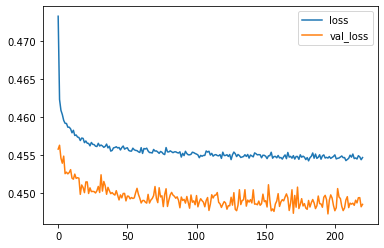

In [37]:
model_loss.plot()

# Evaluate the Model

In [38]:
predictions = model.predict_classes(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.00      0.00     23194
           1       0.80      1.00      0.89     95217

    accuracy                           0.80    118411
   macro avg       0.69      0.50      0.45    118411
weighted avg       0.76      0.80      0.72    118411



[[   54 23140]
 [   40 95177]]
